<a href="https://colab.research.google.com/github/Alejo950326/bases-de-datos/blob/main/TALLER_ANALISIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install mysql-connector-python

import mysql.connector


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
conexion = mysql.connector.connect(user='root', password='Alejo123',
                                host='127.0.0.1', port='3306', database='chinook')

In [ ]:
cursor = conexion.cursor()
cursor.execute('show tables')


In [ ]:
for i in cursor.fetchall():
    print(i)

('album',)
('artist',)
('customer',)
('employee',)
('genre',)
('invoice',)
('invoiceline',)
('mediatype',)
('playlist',)
('playlisttrack',)
('track',)


In [ ]:
cursor.execute('select * from artist')
for i in cursor.fetchall():
    print(i)

(1, 'AC/DC')
(2, 'Accept')
(3, 'Aerosmith')
(4, 'Alanis Morissette')
(5, 'Alice In Chains')
(6, 'Antônio Carlos Jobim')
(7, 'Apocalyptica')
(8, 'Audioslave')
(9, 'BackBeat')
(10, 'Billy Cobham')
(11, 'Black Label Society')
(12, 'Black Sabbath')
(13, 'Body Count')
(14, 'Bruce Dickinson')
(15, 'Buddy Guy')
(16, 'Caetano Veloso')
(17, 'Chico Buarque')
(18, 'Chico Science & Nação Zumbi')
(19, 'Cidade Negra')
(20, 'Cláudio Zoli')
(21, 'Various Artists')
(22, 'Led Zeppelin')
(23, 'Frank Zappa & Captain Beefheart')
(24, 'Marcos Valle')
(25, 'Milton Nascimento & Bebeto')
(26, 'Azymuth')
(27, 'Gilberto Gil')
(28, 'João Gilberto')
(29, 'Bebel Gilberto')
(30, 'Jorge Vercilo')
(31, 'Baby Consuelo')
(32, 'Ney Matogrosso')
(33, 'Luiz Melodia')
(34, 'Nando Reis')
(35, 'Pedro Luís & A Parede')
(36, 'O Rappa')
(37, 'Ed Motta')
(38, 'Banda Black Rio')
(39, 'Fernanda Porto')
(40, 'Os Cariocas')
(41, 'Elis Regina')
(42, 'Milton Nascimento')
(43, 'A Cor Do Som')
(44, 'Kid Abelha')
(45, 'Sandra De Sá')
(46,

In [ ]:
cursor.execute('select country as pais, count(*) as freceuncia from customer group by country order by freceuncia desc limit 10;')
for i in cursor.fetchall():
    print(i)

('USA', 13)
('Canada', 8)
('Brazil', 5)
('France', 5)
('Germany', 4)
('United Kingdom', 3)
('Czech Republic', 2)
('India', 2)
('Portugal', 2)
('Norway', 1)


In [ ]:
#pasar de una consulta sql a un dataframe de pandas
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_sql('select country as pais, count(*) as freceuncia from customer group by country order by freceuncia desc limit 10;', con=conexion)
print(df)


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
             pais  freceuncia
0             USA          13
1          Canada           8
2          Brazil           5
3          France           5
4         Germany           4
5  United Kingdom           3
6  Czech Republic           2
7           India           2
8        Portugal           2
9          Norway           1


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\2006065734.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('select country as pais, count(*) as freceuncia from customer group by country order by freceuncia desc limit 10;', con=conexion)


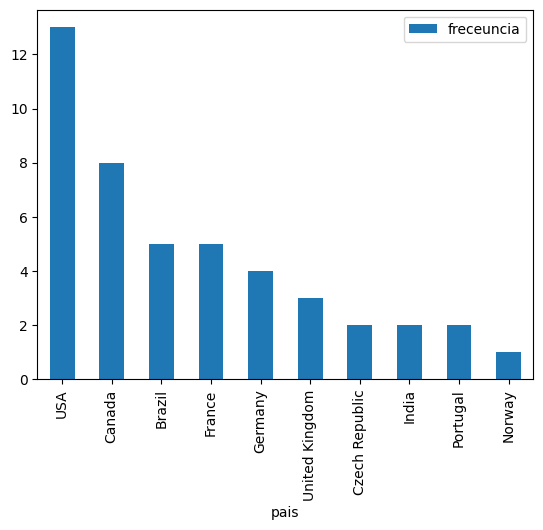

In [ ]:
df.plot.bar(x='pais', y='freceuncia')
plt.show()

In [ ]:
cursor.execute('''
    SELECT ar.Name AS artist, COUNT(al.AlbumId) AS freceuncia
    FROM Album al
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    GROUP BY ar.ArtistId
    ORDER BY freceuncia DESC
    LIMIT 10;
''')
for i in cursor.fetchall():
    print(i)

('Iron Maiden', 21)
('Led Zeppelin', 14)
('Deep Purple', 11)
('Metallica', 10)
('U2', 10)
('Ozzy Osbourne', 6)
('Pearl Jam', 5)
('Lost', 4)
('Faith No More', 4)
('Various Artists', 4)


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\210833074.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_albumes_por_artista = pd.read_sql(
C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\210833074.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_artista = sns.barplot(


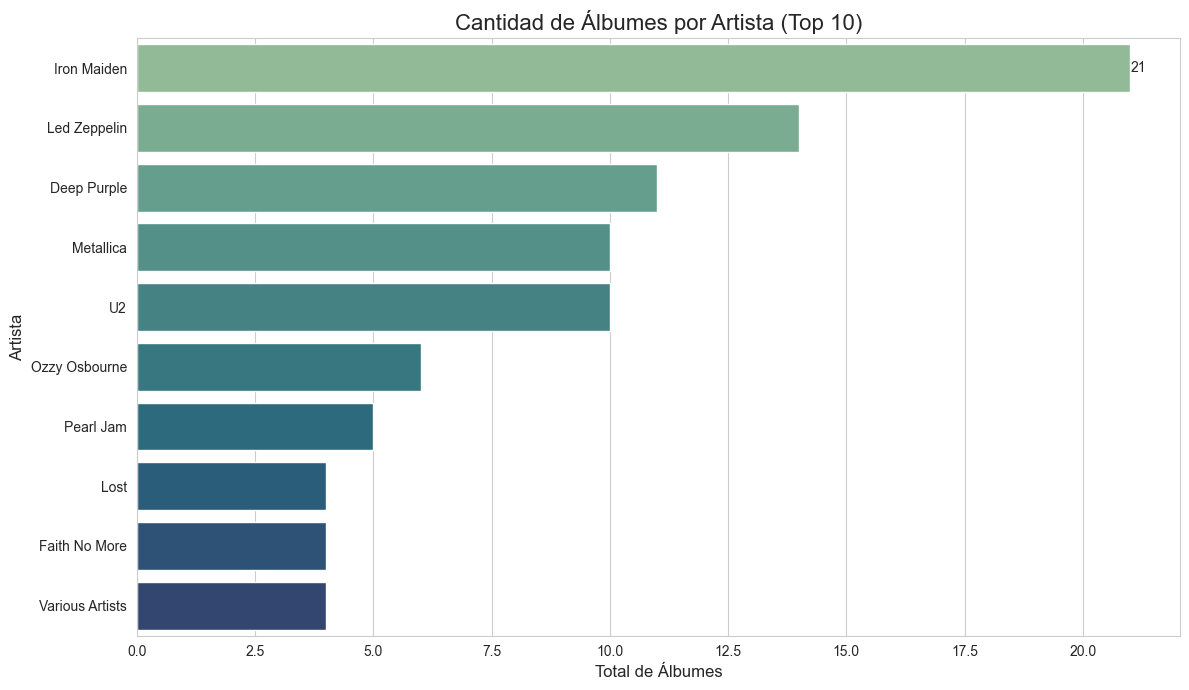

In [ ]:
# cantidad de álbumes por artista
df_albumes_por_artista = pd.read_sql(
    '''
    SELECT ar.Name AS Artista, COUNT(al.AlbumId) AS Total_Albumes
    FROM Album al
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    GROUP BY ar.ArtistId
    ORDER BY Total_Albumes DESC
    LIMIT 10
    ''',
    con=conexion
)

plt.figure(figsize=(12, 7))
ax_artista = sns.barplot(
    x='Total_Albumes',
    y='Artista',
    data=df_albumes_por_artista,
    palette='crest'
)
ax_artista.bar_label(ax_artista.containers[0], fmt='%d')
plt.title('Cantidad de Álbumes por Artista (Top 10)', fontsize=16)
plt.xlabel('Total de Álbumes', fontsize=12)
plt.ylabel('Artista', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#top 10 de los clientes que más gastaron
df_top_clientes = pd.read_sql(
    '''
    SELECT CONCAT(FirstName, ' ', LastName) AS Cliente, SUM(Total) AS Total_Gastado
    FROM Invoice
    JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
    GROUP BY Invoice.CustomerId
    ORDER BY Total_Gastado DESC
    LIMIT 10
    ''',
    con=conexion
)
print(df_top_clientes)

              Cliente  Total_Gastado
0         Helena Holý          49.62
1  Richard Cunningham          47.62
2          Luis Rojas          46.62
3     Ladislav Kovács          45.62
4       Hugh O'Reilly          45.62
5       Julia Barnett          43.62
6     Fynn Zimmermann          43.62
7       Frank Ralston          43.62
8      Victor Stevens          42.62
9       Astrid Gruber          42.62


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\1278129095.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_clientes = pd.read_sql(


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\948284984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_clientes = sns.barplot(


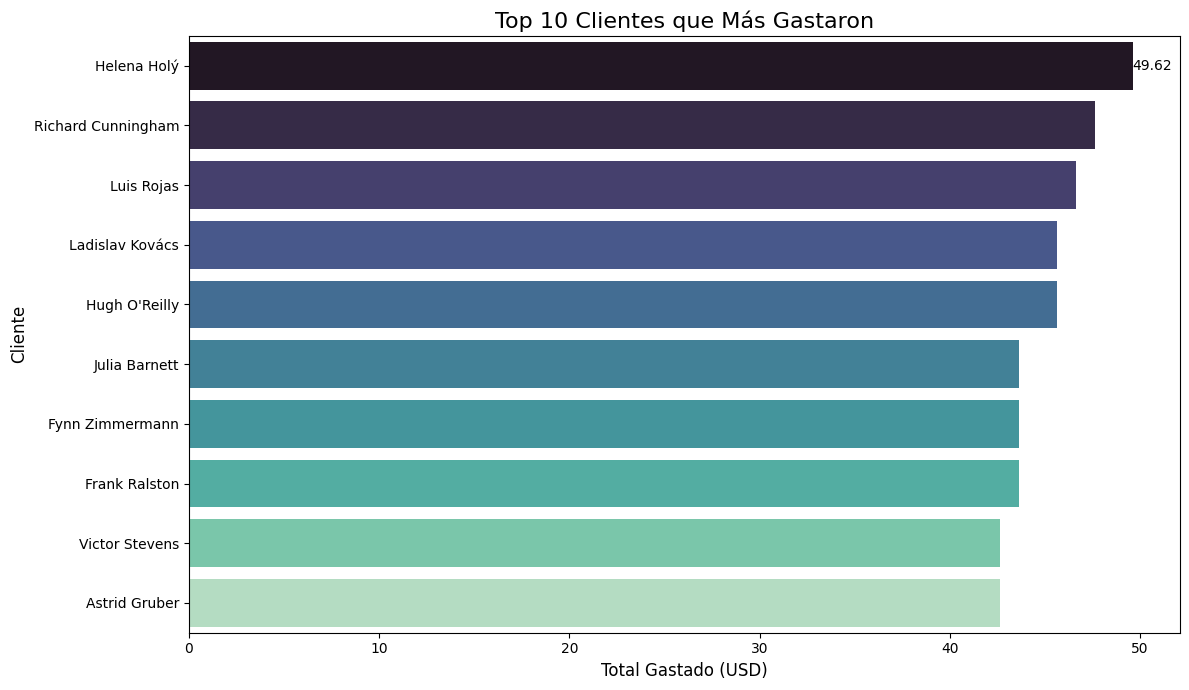

In [ ]:
plt.figure(figsize=(12, 7))
ax_clientes = sns.barplot(
    x='Total_Gastado',
    y='Cliente',
    data=df_top_clientes,
    palette='mako'
)
ax_clientes.bar_label(ax_clientes.containers[0], fmt='%.2f')
plt.title('Top 10 Clientes que Más Gastaron', fontsize=16)
plt.xlabel('Total Gastado (USD)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# top 10 de ciudades con más facturas
df_ciudades_facturas = pd.read_sql(
    '''
    SELECT BillingCity AS Ciudad, COUNT(InvoiceId) AS Total_Facturas
    FROM Invoice
    GROUP BY BillingCity
    ORDER BY Total_Facturas DESC
    LIMIT 10
    ''',
    con=conexion
)
print(df_ciudades_facturas)

          Ciudad  Total_Facturas
0         Prague              14
1         Berlin              14
2          Paris              14
3      São Paulo              14
4  Mountain View              14
5         London              14
6          Porto               7
7           Oslo               7
8       Brussels               7
9         Boston               7


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\3331863329.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ciudades_facturas = pd.read_sql(


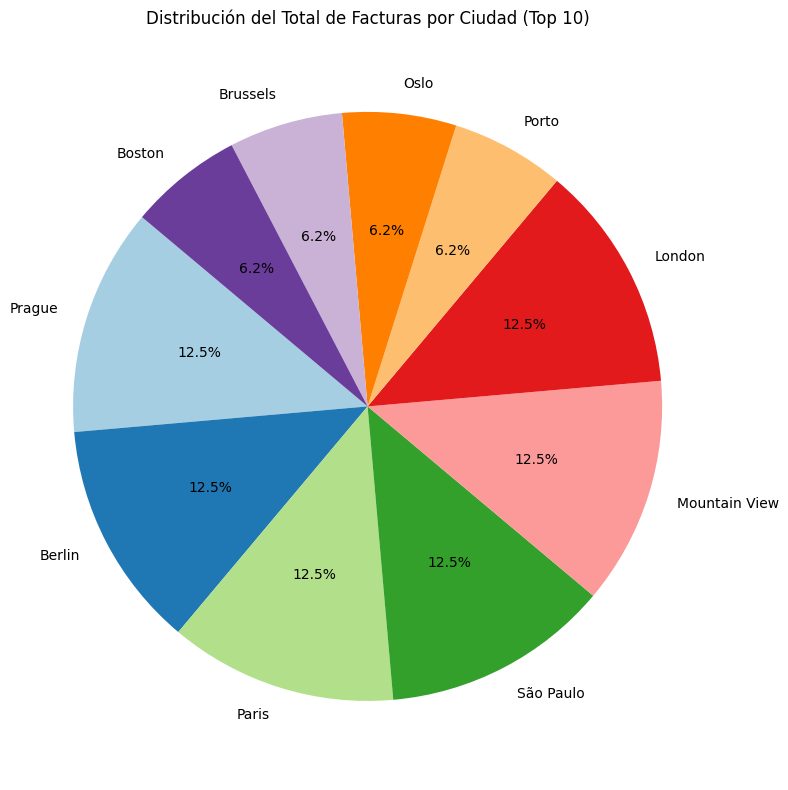

In [ ]:
#total de facturas por ciudad
plt.figure(figsize=(8, 8))
plt.pie(
    df_ciudades_facturas['Total_Facturas'],
    labels=df_ciudades_facturas['Ciudad'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribución del Total de Facturas por Ciudad (Top 10)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#top 10 de los álbumes más vendidos
df_top_albumes = pd.read_sql(
    '''
    SELECT al.Title AS Album, ar.Name AS Artista, COUNT(il.TrackId) AS Total_Ventas
    FROM InvoiceLine il
    JOIN Track t ON il.TrackId = t.TrackId
    JOIN Album al ON t.AlbumId = al.AlbumId
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    GROUP BY al.AlbumId
    ORDER BY Total_Ventas DESC
    LIMIT 10
    ''',
    con=conexion
)
print(df_top_albumes)

                                      Album                       Artista  \
0                            Minha Historia                 Chico Buarque   
1                             Greatest Hits                 Lenny Kravitz   
2                                 Unplugged                  Eric Clapton   
3                                  Acústico                         Titãs   
4                             Greatest Kiss                          Kiss   
5  My Generation - The Very Best Of The Who                       The Who   
6                              Prenda Minha                Caetano Veloso   
7                         Chronicle, Vol. 2  Creedence Clearwater Revival   
8                   International Superhits                     Green Day   
9                         Chronicle, Vol. 1  Creedence Clearwater Revival   

   Total_Ventas  
0            27  
1            26  
2            25  
3            22  
4            20  
5            19  
6            19  
7       

C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\3933124238.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_albumes = pd.read_sql(


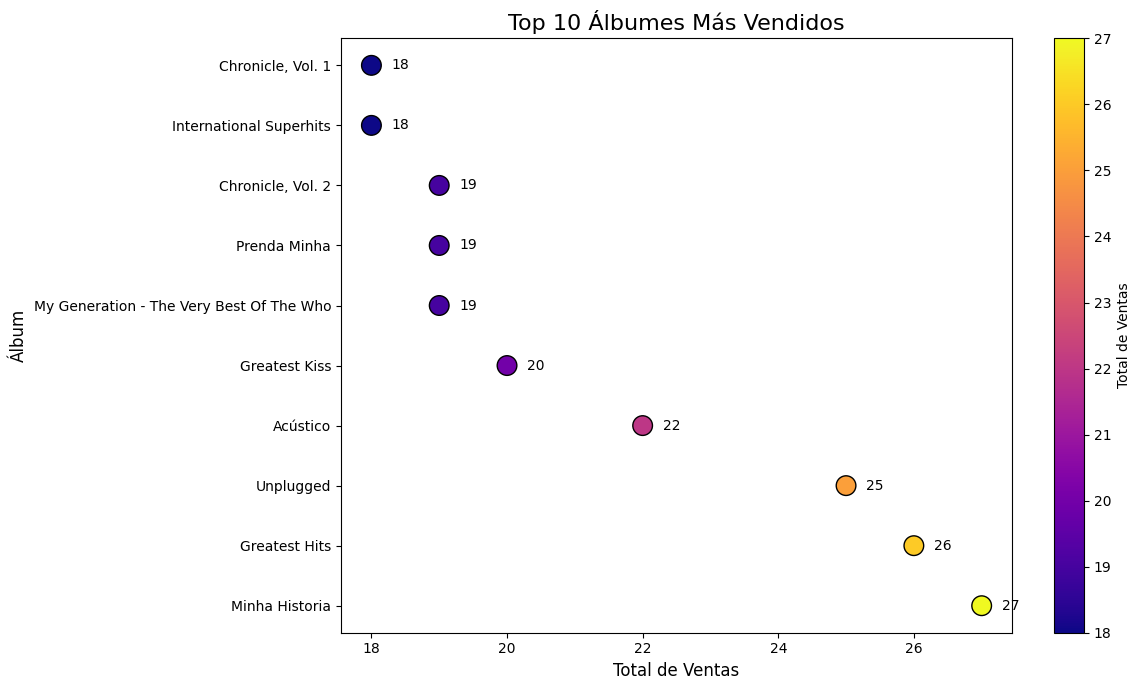

In [ ]:
#top 10 de álbumes más vendidos
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_top_albumes['Total_Ventas'],
    df_top_albumes['Album'],
    c=df_top_albumes['Total_Ventas'],
    cmap='plasma',
    s=200,
    edgecolor='black'
)
plt.title('Top 10 Álbumes Más Vendidos', fontsize=16)
plt.xlabel('Total de Ventas', fontsize=12)
plt.ylabel('Álbum', fontsize=12)

# Agregar etiquetas de datos
for idx, row in df_top_albumes.iterrows():
    plt.text(
        row['Total_Ventas'] + 0.3,  # desplazamiento horizontal
        row['Album'],
        str(row['Total_Ventas']),
        va='center',
        fontsize=10
    )

plt.colorbar(scatter, label='Total de Ventas')
plt.tight_layout()
plt.show()

In [ ]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
cursor.execute('select G.Name AS Nombre_Genero, COUNT(T.GenreId) AS Numero_de_Canciones FROM Track T JOIN Genre G ON T.GenreId = G.GenreId GROUP BY T.GenreId;')

for i in cursor.fetchall():
    print(i)

('Rock', 1297)
('Jazz', 130)
('Metal', 374)
('Alternative & Punk', 332)
('Rock And Roll', 12)
('Blues', 81)
('Latin', 579)
('Reggae', 58)
('Pop', 48)
('Soundtrack', 43)
('Bossa Nova', 15)
('Easy Listening', 24)
('Heavy Metal', 28)
('R&B/Soul', 61)
('Electronica/Dance', 30)
('World', 28)
('Hip Hop/Rap', 35)
('Science Fiction', 13)
('TV Shows', 93)
('Sci Fi & Fantasy', 26)
('Drama', 64)
('Comedy', 17)
('Alternative', 40)
('Classical', 74)
('Opera', 1)


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\2198458341.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_albumes_por_genero = pd.read_sql(
C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\2198458341.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


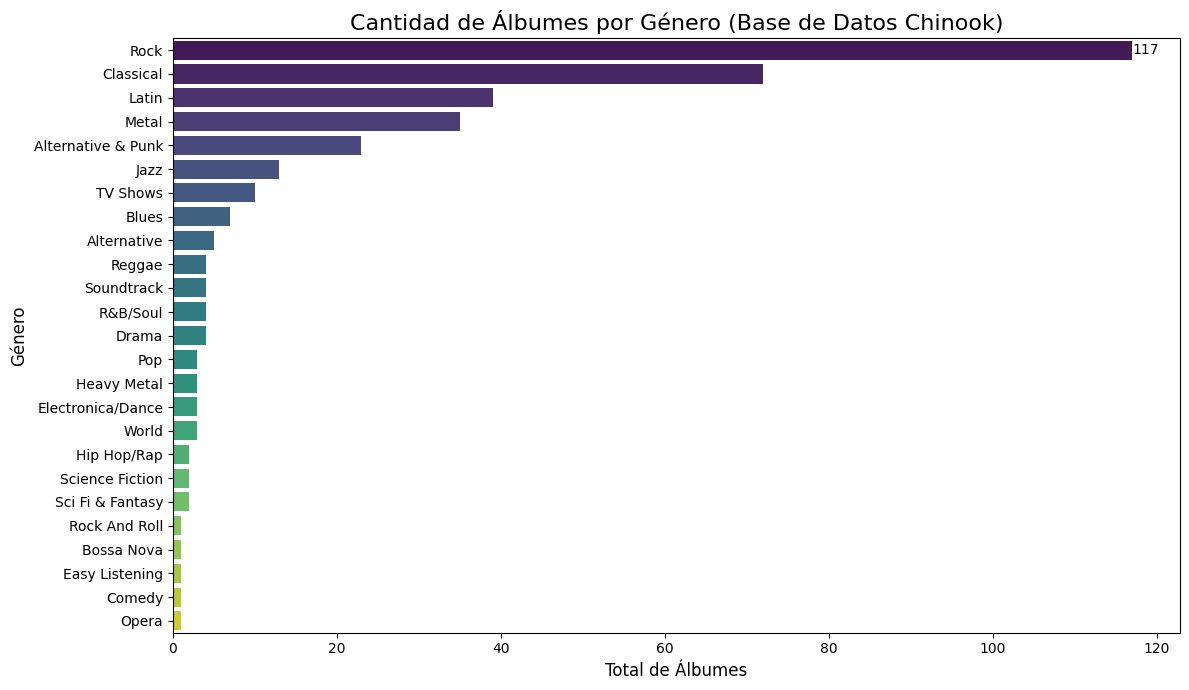

In [ ]:
import seaborn as sns

#albumes por genero
df_albumes_por_genero = pd.read_sql(
    '''
    SELECT G.Name AS Nombre_Genero, COUNT(DISTINCT A.AlbumId) AS Total_Albumes
    FROM Album A
    JOIN Track T ON A.AlbumId = T.AlbumId
    JOIN Genre G ON T.GenreId = G.GenreId
    GROUP BY G.GenreId
    ORDER BY Total_Albumes DESC
    ''',
    con=conexion
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Total_Albumes',
    y='Nombre_Genero',
    data=df_albumes_por_genero,
    palette='viridis'
)
ax.bar_label(ax.containers[0], fmt='%d')
plt.title('Cantidad de Álbumes por Género (Base de Datos Chinook)', fontsize=16)
plt.xlabel('Total de Álbumes', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#top 10 de las ciudades con más clientes
df_top_ciudades_clientes = pd.read_sql(
    '''
    SELECT City AS Ciudad, COUNT(CustomerId) AS Total_Clientes
    FROM Customer
    GROUP BY City
    ORDER BY Total_Clientes DESC
    LIMIT 10
    ''',
    con=conexion
)
print(df_top_ciudades_clientes)

          Ciudad  Total_Clientes
0         London               2
1          Paris               2
2         Prague               2
3      São Paulo               2
4         Berlin               2
5  Mountain View               2
6      Stuttgart               1
7           Oslo               1
8         Vienne               1
9       Brussels               1


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\13600913.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_ciudades_clientes = pd.read_sql(


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\108183700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_ciudades = sns.barplot(


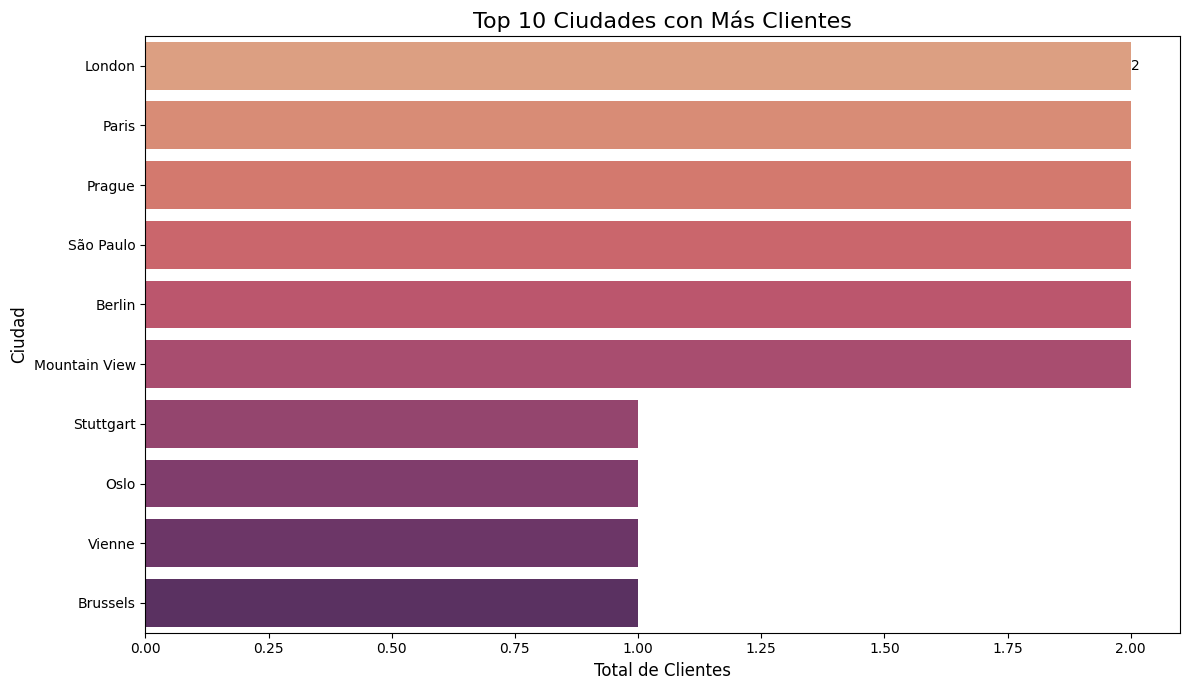

In [ ]:
plt.figure(figsize=(12, 7))
ax_ciudades = sns.barplot(
    x='Total_Clientes',
    y='Ciudad',
    data=df_top_ciudades_clientes,
    palette='flare'
)
ax_ciudades.bar_label(ax_ciudades.containers[0], fmt='%d')
plt.title('Top 10 Ciudades con Más Clientes', fontsize=16)
plt.xlabel('Total de Clientes', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:

df_artistas_mas_vendidos = pd.read_sql(
    '''
    SELECT ar.Name AS Artista, COUNT(il.TrackId) AS Total_Ventas
    FROM InvoiceLine il
    JOIN Track t ON il.TrackId = t.TrackId
    JOIN Album al ON t.AlbumId = al.AlbumId
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    GROUP BY ar.ArtistId
    ORDER BY Total_Ventas DESC
    LIMIT 10
    ''',
    con=conexion
)
print(df_artistas_mas_vendidos)

                   Artista  Total_Ventas
0              Iron Maiden           140
1                       U2           107
2                Metallica            91
3             Led Zeppelin            87
4  Os Paralamas Do Sucesso            45
5              Deep Purple            44
6            Faith No More            42
7                     Lost            41
8             Eric Clapton            40
9                   R.E.M.            39


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\1404880366.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_artistas_mas_vendidos = pd.read_sql(


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\1440946138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_artistas_ventas = sns.barplot(


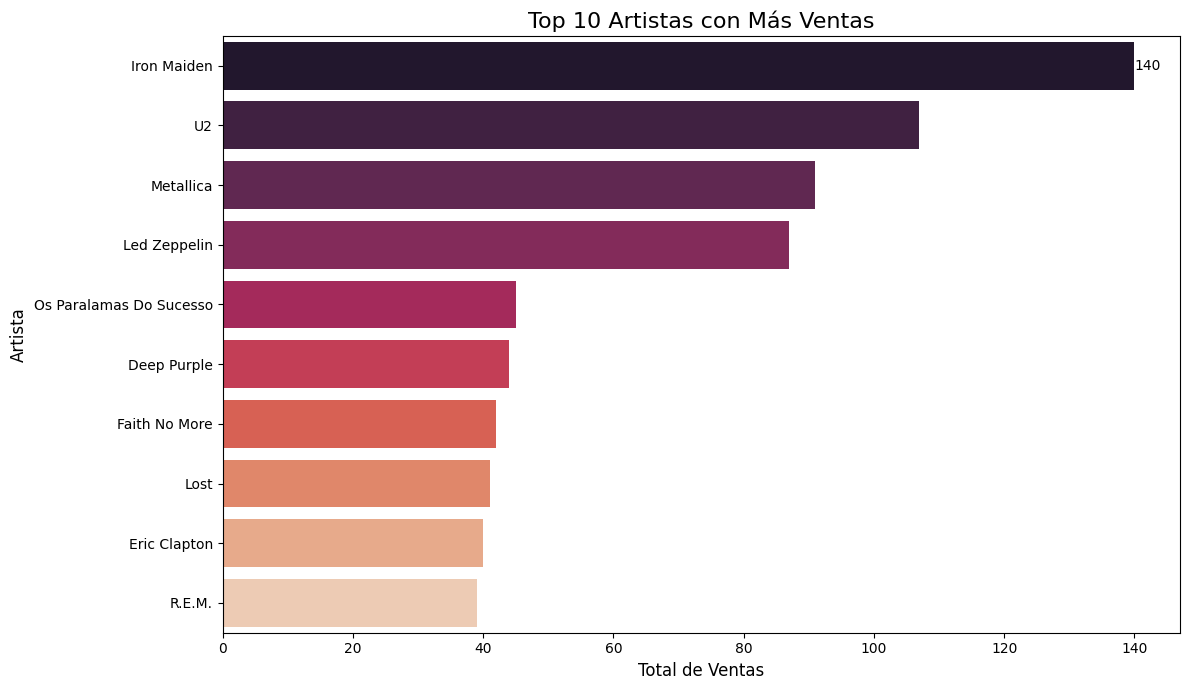

In [ ]:
plt.figure(figsize=(12, 7))
ax_artistas_ventas = sns.barplot(
    x='Total_Ventas',
    y='Artista',
    data=df_artistas_mas_vendidos,
    palette='rocket'
)
ax_artistas_ventas.bar_label(ax_artistas_ventas.containers[0], fmt='%d')
plt.title('Top 10 Artistas con Más Ventas', fontsize=16)
plt.xlabel('Total de Ventas', fontsize=12)
plt.ylabel('Artista', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Crear un DataFrame con la cuantía total de ventas por artista
df_ventas_por_artista = pd.read_sql(
    '''
    SELECT ar.Name AS Artista, SUM(il.UnitPrice * il.Quantity) AS Total_Ventas_USD
    FROM InvoiceLine il
    JOIN Track t ON il.TrackId = t.TrackId
    JOIN Album al ON t.AlbumId = al.AlbumId
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    GROUP BY ar.ArtistId
    ORDER BY Total_Ventas_USD DESC
    ''',
    con=conexion
)
print(df_ventas_por_artista)

                                          Artista  Total_Ventas_USD
0                                     Iron Maiden            138.60
1                                              U2            105.93
2                                       Metallica             90.09
3                                    Led Zeppelin             86.13
4                                            Lost             81.59
..                                            ...               ...
160  Kent Nagano and Orchestre de l'Opéra de Lyon              0.99
161                                  Julian Bream              0.99
162                                 Martin Roscoe              0.99
163            Göteborgs Symfoniker & Neeme Järvi              0.99
164                            Michele Campanella              0.99

[165 rows x 2 columns]


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\2214441632.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ventas_por_artista = pd.read_sql(


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\767927700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_ventas_artista = sns.barplot(


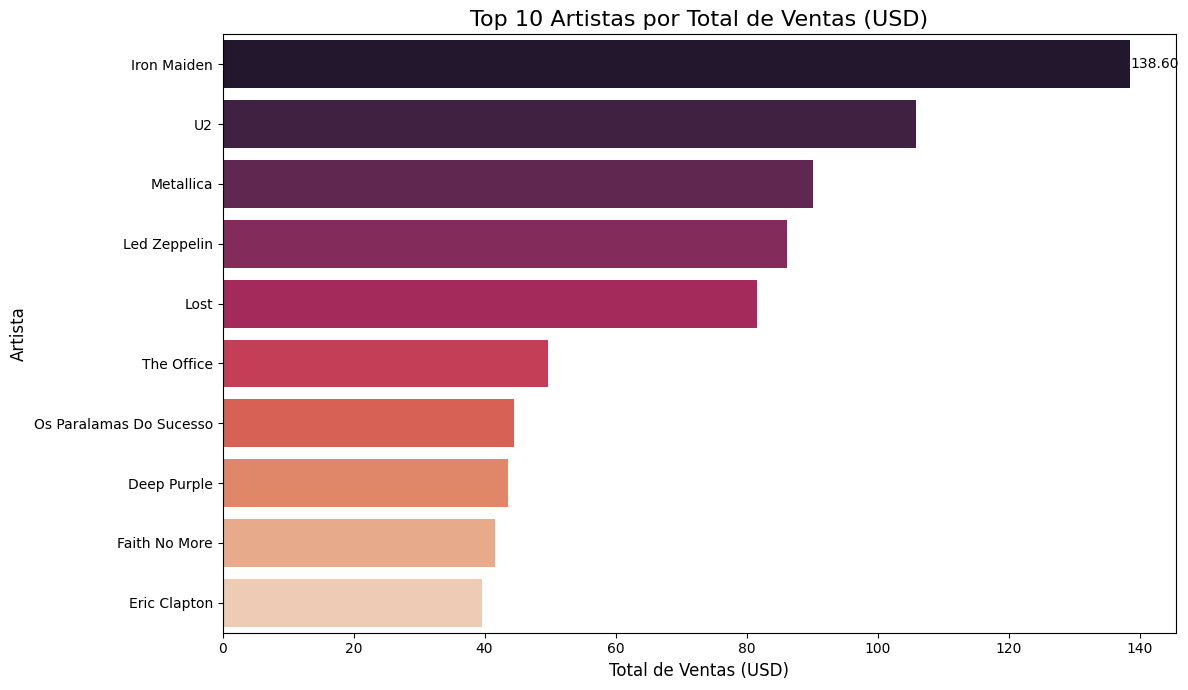

In [ ]:
plt.figure(figsize=(12, 7))
ax_ventas_artista = sns.barplot(
    x='Total_Ventas_USD',
    y='Artista',
    data=df_ventas_por_artista.head(10),
    palette='rocket'
)
ax_ventas_artista.bar_label(ax_ventas_artista.containers[0], fmt='%.2f')
plt.title('Top 10 Artistas por Total de Ventas (USD)', fontsize=16)
plt.xlabel('Total de Ventas (USD)', fontsize=12)
plt.ylabel('Artista', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Usaremos la tabla Invoice, que contiene la columna 'Total' (monto de la factura, variable continua)
df_facturas = pd.read_sql(
    '''
    SELECT InvoiceId, CustomerId, Total
    FROM Invoice
    ''',
    con=conexion
)
print(df_facturas.head())

   InvoiceId  CustomerId  Total
0          1           2   1.98
1          2           4   3.96
2          3           8   5.94
3          4          14   8.91
4          5          23  13.86


C:\Users\Analista Grupo Exito\AppData\Local\Temp\ipykernel_11856\332826815.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_facturas = pd.read_sql(


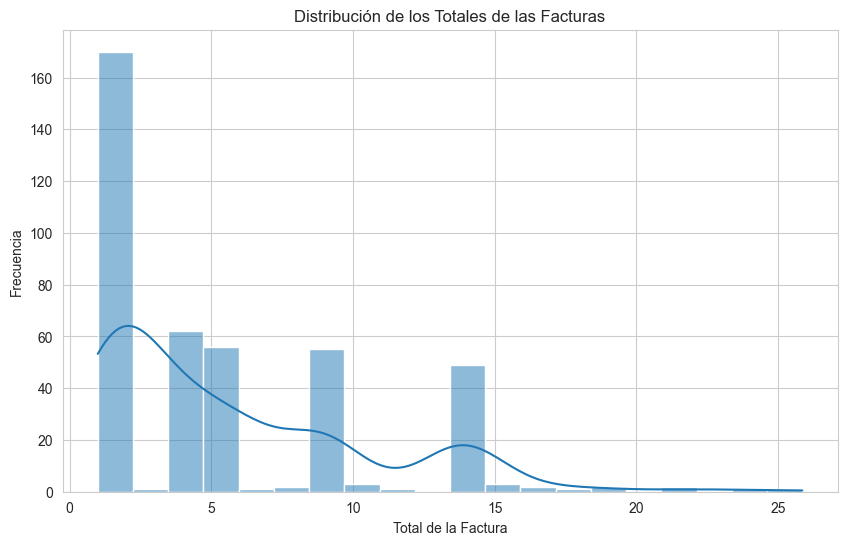

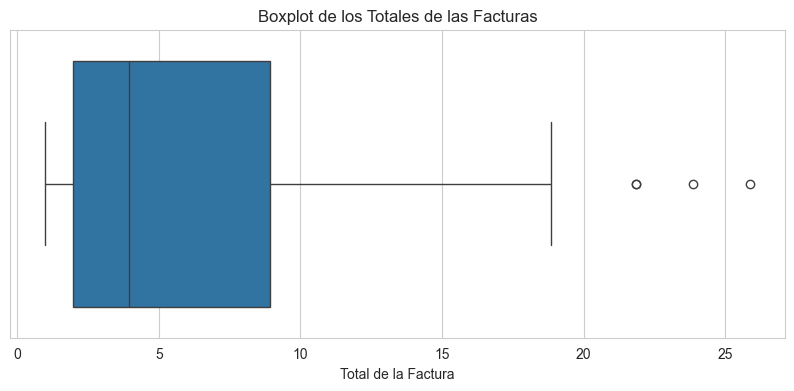

In [ ]:

sns.set_style("whitegrid")

# 2. Gráfico 1: Histograma de la columna 'Total' (Distribución)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_facturas, x='Total', kde=True, bins=20)
plt.title('Distribución de los Totales de las Facturas')
plt.xlabel('Total de la Factura')
plt.ylabel('Frecuencia')
plt.show()

# ---

# 3. Gráfico 2: Boxplot de la columna 'Total' (Detección de Outliers)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_facturas, x='Total')
plt.title('Boxplot de los Totales de las Facturas')
plt.xlabel('Total de la Factura')
plt.show()